In [1]:
import pandas as pd

sample_dict = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'London', 'Paris']
}

sandbox = pd.DataFrame.from_dict(sample_dict)

/home/repos/venv/trickycases/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [26]:
sandbox.head()

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris


## Properties

In [2]:
print("Index")
print(sandbox.index)
print()
print("Columns")
print(sandbox.columns)
print()
print("Values")
print(sandbox.values)
print()
print("Dtypes")
print(sandbox.dtypes)
print()

print("Dimensions")
print(sandbox.ndim)
print()

print("Shape")
print(sandbox.shape)
print()

Index
RangeIndex(start=0, stop=3, step=1)

Columns
Index(['Name', 'Age', 'City'], dtype='object')

Values
[['Alice' 25 'New York']
 ['Bob' 30 'London']
 ['Charlie' 35 'Paris']]

Dtypes
Name    object
Age      int64
City    object
dtype: object

Dimensions
2

Shape
(3, 3)



https://pbpython.com/pandas_dtypes.html

## Methods

In [29]:
type(sandbox['Name'].apply)

method

In [30]:
type(sandbox['Name'].index)

pandas.core.indexes.range.RangeIndex

In [3]:
sandbox['Name'].apply(lambda x: len(x))

0    5
1    3
2    7
Name: Name, dtype: int64

In [4]:
sandbox.apply(lambda x: len(x['Name']), axis = 1)

0    5
1    3
2    7
dtype: int64

In [5]:
for index, row in list(sandbox.iterrows()):
    print(len(row['Name']))

5
3
7


## Selectors

In [31]:
sandbox[sandbox['Name'].isin(['Alice'])]['Name'] = 'Kevin'

/home/repos/venv/trickycases/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
sandbox

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris


In [7]:
sandbox.iloc[0]

Name       Alice
Age           25
City    New York
Name: 0, dtype: object

In [35]:
sandbox[sandbox['Name'] == 'Alice']['Name'] = 'Kevin'

/home/repos/venv/trickycases/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
sandbox

,Name,Age,City
0,Alice,25,New York
1,Bob,30,London
2,Charlie,35,Paris


## Melting

In [9]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math': [90, 85, 92],
    'Science': [80, 88, 78],
    'History': [95, 91, 88]
}

df = pd.DataFrame(data)

melted_df = pd.melt(df, id_vars='Name', var_name='Subject', value_name='Score')

melted_df

,Name,Subject,Score
0,Alice,Math,90
1,Bob,Math,85
2,Charlie,Math,92
3,Alice,Science,80
4,Bob,Science,88
5,Charlie,Science,78
6,Alice,History,95
7,Bob,History,91
8,Charlie,History,88


In [10]:
pivot_df = melted_df.pivot(index='Name', columns='Subject', values='Score')

pivot_df

Subject,History,Math,Science
Name,,,
Alice,95,90,80
Bob,91,85,88
Charlie,88,92,78


## Real Case

In [11]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

df = pd.concat([train, test])

In [12]:
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243.0


In [13]:
df.describe()

,cfips,microbusiness_density,active
count,147345.00000,122265.000000,1.222650e+05
mean,30376.03764,3.817671,6.442858e+03
std,15143.49818,4.991087,3.304001e+04
min,1001.00000,0.000000,0.000000e+00
25%,18177.00000,1.639344,1.450000e+02
50%,29173.00000,2.586543,4.880000e+02
75%,45077.00000,4.519231,2.124000e+03
max,56045.00000,284.340030,1.167744e+06


In [38]:
df.isna().sum()

row_id                       0
cfips                        0
county                   25080
state                    25080
first_day_of_month           0
microbusiness_density    25080
active                   25080
timestamp                    0
date                         0
year                         0
country_code                 0
state_code                   0
day_of_experiment            0
population_date              0
population_year              0
is_test                      0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147345 entries, 0 to 25079
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   row_id                 147345 non-null  object         
 1   cfips                  147345 non-null  int64          
 2   county                 122265 non-null  object         
 3   state                  122265 non-null  object         
 4   first_day_of_month     147345 non-null  object         
 5   microbusiness_density  122265 non-null  float64        
 6   active                 122265 non-null  float64        
 7   timestamp              147345 non-null  object         
 8   date                   147345 non-null  datetime64[ns] 
 9   year                   147345 non-null  int64          
 10  country_code           147345 non-null  int64          
 11  state_code             147345 non-null  int64          
 12  day_of_experiment      147345 n

## Cleaning Data

In [14]:
basedate = pd.Timestamp('2019-08-01')

df = df.assign(
    timestamp = lambda x: x['row_id'].str.split('_').str[1],
    date = lambda x: pd.to_datetime(x['timestamp']),
    year = lambda x: x['date'].dt.year,
    country_code = lambda x: x['cfips'] // 100,
    state_code = lambda x: x['cfips'] % 100,
    day_of_experiment = lambda x: (x['date'] - basedate),
    population_date = lambda x: x['date'] - pd.DateOffset(years=2),
    population_year = lambda x: x['population_date'].dt.year,
    is_test = lambda x: x['county'].isna()
)

In [39]:
df['date'] = (
    pd.to_datetime(df['timestamp'])\
                .method()
)
df['date'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['timestamp'])


In [15]:
df.columns

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active', 'timestamp', 'date', 'year',
       'country_code', 'state_code', 'day_of_experiment', 'population_date',
       'population_year', 'is_test'],
      dtype='object')

## Exploratory Data Analysis

In [43]:
train.head(50)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
5,1001_2020-01-01,1001,Autauga County,Alabama,2020-01-01,2.969090,1242
6,1001_2020-02-01,1001,Autauga County,Alabama,2020-02-01,2.909326,1217
7,1001_2020-03-01,1001,Autauga County,Alabama,2020-03-01,2.933231,1227
8,1001_2020-04-01,1001,Autauga County,Alabama,2020-04-01,3.000167,1255
9,1001_2020-05-01,1001,Autauga County,Alabama,2020-05-01,3.004948,1257


In [17]:
train.tail()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100
122264,56045_2022-10-01,56045,Weston County,Wyoming,2022-10-01,1.785395,100


In [44]:
train['county'].value_counts(normalize=True)

Washington County        0.009569
Jefferson County         0.007974
Franklin County          0.007656
Lincoln County           0.007337
Jackson County           0.007337
                           ...   
Androscoggin County      0.000319
Winn Parish              0.000319
West Feliciana Parish    0.000319
West Carroll Parish      0.000319
Weston County            0.000319
Name: county, Length: 1871, dtype: float64

In [47]:
train.groupby(['county', '', '', ''], as_index = False)['county'].agg(
{
    ''
})

county
Abbeville County              39
Acadia Parish                 39
Accomack County               39
Ada County                    39
Adair County                 156
                            ... 
Yukon-Koyukuk Census Area     39
Yuma County                   78
Zapata County                 39
Zavala County                 39
Ziebach County                39
Name: county, Length: 1871, dtype: int64

In [20]:
first = df[df['cfips'] == 1001]

first[['microbusiness_density', 'year']].corr()

,microbusiness_density,year
microbusiness_density,1.000000,0.852428
year,0.852428,1.000000


In [21]:
first['microbusiness_density'].pct_change().head(10)

0         NaN
1   -0.040833
2    0.059265
3   -0.020489
4    0.000000
5   -0.008066
6   -0.020129
7    0.008217
8    0.022820
9    0.001594
Name: microbusiness_density, dtype: float64

In [49]:
first['microbusiness_density'].pct_change().head(10).fillna(0)

0    0.000000
1   -0.040833
2    0.059265
3   -0.020489
4    0.000000
5   -0.008066
6   -0.020129
7    0.008217
8    0.022820
9    0.001594
Name: microbusiness_density, dtype: float64

In [23]:
first['cumsum'] = first['microbusiness_density'].cumsum()

s = 1 - first['microbusiness_density'] / first['microbusiness_density'].shift(1)

s.head(10)

/home/repos/venv/trickycases/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         NaN
1    0.040833
2   -0.059265
3    0.020489
4    0.000000
5    0.008066
6    0.020129
7   -0.008217
8   -0.022820
9   -0.001594
Name: microbusiness_density, dtype: float64

In [24]:
import numpy as np

first.pivot_table(
    index = 'county',
    columns='year', 
    values='microbusiness_density', 
    aggfunc=np.mean
)

year,2019,2020,2021,2022
county,,,,
Autauga County,2.986972,3.044592,3.181585,3.376788


## Plotting

<AxesSubplot:xlabel='date'>

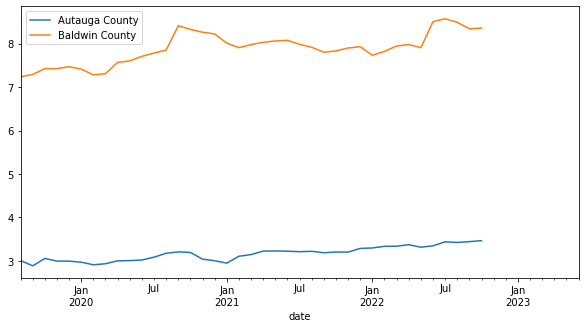

In [25]:
first = df[df['cfips'] == 1001]
another = df[df['cfips'] == 1003]

ax = first.plot(x='date', y='microbusiness_density', figsize=(10, 5), label='Autauga County', kind='line')
another.plot(x='date', y='microbusiness_density', ax=ax, label='Baldwin County')
